# Analysis

## Environment Preparation

In [21]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import data_prep

## Preprocessing

In [22]:
# List all data files which should be preprocessed
data_files = ['data_nora.csv', 'data_clara.csv', 'data_anja.csv'] # , 'data_nora.csv'

In [23]:
# Call preprocessing function and store data in one data df
data = data_prep.prepare_data(data_files)

In [24]:
# Detele practice trials and create practice subset
practice_trials = data[data['block'] == 'Test']
data = data[data['block'] != 'Test']

In [25]:
# Create trial index per participant (after test trials were deleted!)
data['trial_index_within_participant'] = data.groupby('participant').cumcount() + 1

In [26]:
# Store preprocessed data in csv
data.to_csv('/Users/anja/Desktop/data_mt/data_preprocessed.csv', index=False)

## Analysis

In [34]:
# Error Rate per participant
# Add bool column for error in decision
data['error_in_decision'] = data[['bool_slow_color_choice_or_confirm', 'bool_wrong_color_confirm']].any(axis=1).astype(int)

# Add bool column for error in owner confirm
data['error_in_outcome_attribution'] = data[['bool_slow_owner_confirm', 'bool_wrong_owner_confirm']].any(axis=1).astype(int)

# Group by participant and sum the errors
errors_per_participant = data.groupby('participant')[['error_in_decision', 'error_in_outcome_attribution']].sum().reset_index()

# Calculate ratios
total_trials = 384
errors_per_participant['error_in_decision_ratio'] = round(((errors_per_participant['error_in_decision'] / total_trials) * 100),2)
errors_per_participant['error_in_outcome_attribution_ratio'] = round(((errors_per_participant['error_in_outcome_attribution'] / total_trials) *100),2)

print (errors_per_participant)


   participant  error_in_decision  error_in_outcome_attribution  \
0       266736                  6                            42   
1       852838                  5                            56   
2       983181                 15                            43   

   error_in_decision_ratio  error_in_outcome_attribution_ratio  
0                     1.56                               10.94  
1                     1.30                               14.58  
2                     3.91                               11.20  


In [35]:
# Clean from rows where response was too slow or wrong 
#TODO: discuss what we want to sort out?
data_n = data[(data['bool_slow_color_choice_or_confirm'] == False) & 
            (data['bool_wrong_color_confirm'] == False) & 
            (data['bool_slow_owner_confirm'] == False) & 
            (data['bool_wrong_owner_confirm'] == False)]

In [36]:
# Store preprocessed data in csv
data.to_csv('/Users/anja/Desktop/data_mt/data_cleaned.csv', index=False)

In [37]:
# Mean age, handedness, gender?

In [38]:
# Normal distribution of reaction time? Any outliers?

<Axes: xlabel='identifier_chooser_owner_value_corr', ylabel='owner_confirm_rt'>

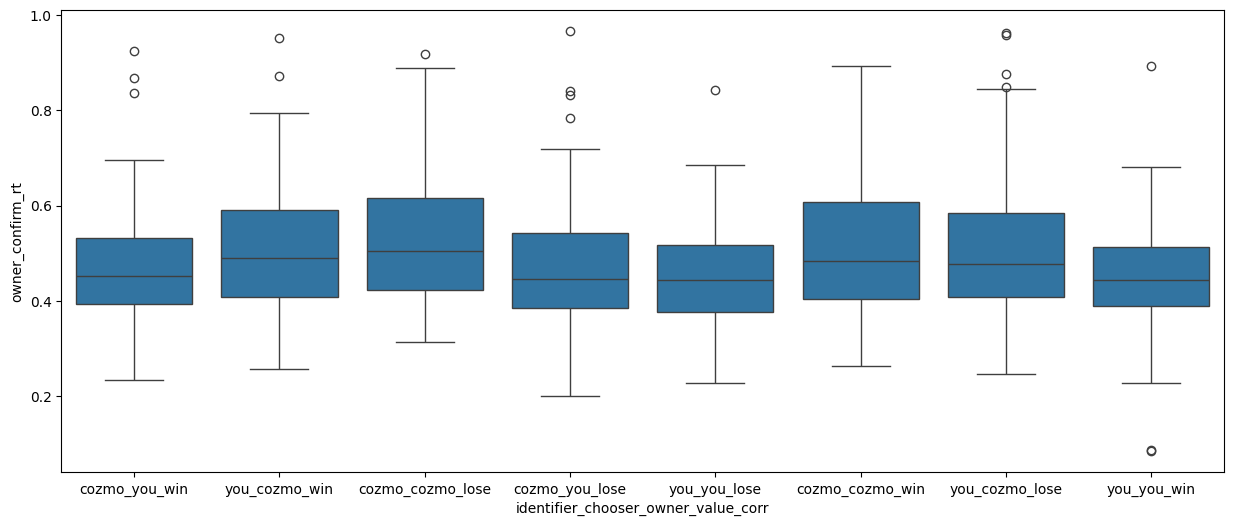

In [39]:
# Reaction time per condition group 
#TODO:change to violin plot when more data is available https://python-graph-gallery.com/39-hidden-data-under-boxplot/
plt.figure(figsize=(15, 6)) 
sns.boxplot( x=data["identifier_chooser_owner_value_corr"], y=data["owner_confirm_rt"] )

<Axes: xlabel='trial_index_within_participant', ylabel='owner_confirm_rt'>

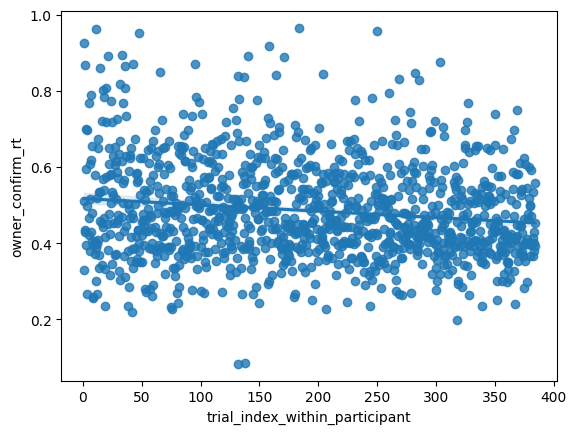

In [40]:
# how does reaction time develope over time? learing effects? do get people faster? 
# TODO: add give keep group info, or avoid overplotting https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/ 
sns.regplot(x=data["trial_index_within_participant"], y=data["owner_confirm_rt"])

In [41]:
# do people prefer one choice? i mean by side? Are they faster by one side? maybe related to handedness?

In [42]:
# Als variable anschauen wie viel gewinn oder Verlust Cozmo schon hatte.


In [43]:
# is it easier to give when cozmo anyways has a lower balance than have?